In [1]:
 !pip install matplotlib image_slicer scipy

In [88]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image, ImageEnhance
import os
import image_slicer

%matplotlib inline

prefix = 'images'

In [113]:
def display_image(image=None, filename=None):
    if filename:
        image = Image.open(os.path.join(prefix,filename), 'r')
    imshow(np.asarray(image))
    
def open_image(filename=None):
    image = Image.open(os.path.join(prefix,filename), 'r')
    return image
    
def slice_filename(filename,n=5):
    tiles = image_slicer.slice(os.path.join(prefix,filename), n, save=False)
    return tiles

def median_image_from_images(images, mode=np.median):
    imgs = np.array([np.asarray(image) for image in images]) 
    med = mode(imgs, axis=0)
    img = Image.fromarray(np.uint8(med))
    return img

def generate_tile_images(image, tile_width, tile_height):
    if image.size[0] % tile_width == 0 and image.size[1] % tile_height == 0 :
        currentx = 0
        currenty = 0
        while currenty < image.size[1]:
            while currentx < image.size[0]:
                tile = image.crop((currentx,currenty,currentx + tile_width,currenty + tile_height))
                yield tile, currentx, currenty#tile.save("x" + str(currentx) + "y" + str(currenty) + "z" + zoom_level + ".png","PNG")
                currentx += tile_width
            currenty += tile_height
            currentx = 0
    else:
        raise Exception()
        
def find_ideal_width_and_height(image, width, height):
    found = [0,0]
    for i in range(-80,80):
        if image.size[0] % width + i == 0:
            width += i
            found[0] = 1

            break
            
    for i in range(-60,60):
        if image.size[1] % height + i == 0:
            height += i
            found[1] = 1
            break
    if sum(found) != 2:
        raise Exception()
    return width, height

In [24]:
help(mode)

NameError: name 'mode' is not defined

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


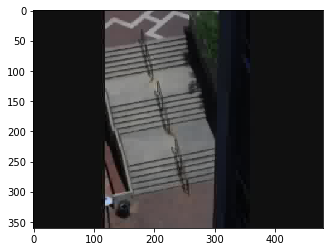

In [126]:
def slice_filename_and_show(n=3):
    filenames = os.listdir('images')
    tilesets = []#[[]] * len(filenames)
    t_width = t_height = 0
    for index,filename in enumerate(filenames):
        img = open_image(filename)
        t_width, t_height = img.size
        width,height = find_ideal_width_and_height(img, int(t_width/5), int(t_height/5))
        tiles = list(generate_tile_images(img, width, height))
        tilesets.append(tiles)
        
    new_im = Image.new('RGB', (t_width, t_height))
        
        
    for n in range(len(tilesets[0])):
        print(n, flush=True)
        tiles = [t[n][0] for t in tilesets]

        img = median_image_from_images(tiles, mode=np.median)
        tile = tilesets[0][n]
        _, x,y = tile
        new_im.paste(img, (x,y))
    
    #enhancer = ImageEnhance.Brightness(new_im)
    #new_im = enhancer.enhance(5.0)
    display_image(new_im)
    display_image(new_im)
    new_im.save("out.png")
        
slice_filename_and_show(1)

